### Цель работы:

Смоделировать процесс восстановления золота из золотосодержащей руды

### Этапы работы:

#### Шаг 1. Подготовка данных

На данном этапе необходимо изучить основную информацию о данных, проверить рассчитанные признаки и произвести предобработку данных.

#### Шаг 2. Анализ данных

Этот шаг позволяет оценить существующие признаки и распределение данных в тестовой и обучающей выборках.


#### Шаг 3. Построение модели

На этом этапе необходимо подобрать наилучшую модель и применить её на тестовой выборке. 

### Оглавление

### [1. Подготовка данных](#step_1)

#### [1.1 Изучение файлов](#step_1.1)
#### [1.2 Проверка рассчётов эффективности](#step_1.2)
#### [1.3 Анализ признаков, недоступных в тестовой выборке](#step_1.3)


### [2. Анализ данных](#step_2)

#### [2.1 Изменение концентрации металлов на различных этапах очистки](#step_2.1)
#### [2.2 Сравнение распределения размеров гранул сырья](#step_2.2)
#### [2.3 Исследование суммарной концентрации всех веществ на разных стадиях](#step_2.3)


### [3. Построение модели](#step_3)

#### [3.1. Функция для вычисления итоговой sMAPE](#step_3.1)
#### [3.2. Обучение моделей, оценка лучшей модели на тестовой выборке](#step_3.2)


### [Итоговый вывод](#step_4)


In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

### 1. Подготовка данных
<a id='step_1'></a>

#### 1.1 Изучение файлов
<a id='step_1.1'></a>

In [2]:
try:
    data_train = pd.read_csv('/Users/anastasiapodbolotova/Downloads/gold_recovery_train.csv')
except: 
    data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_train.info()
display(data_train.head(15))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [3]:
try:
    data_test = pd.read_csv('/Users/anastasiapodbolotova/Downloads/gold_recovery_test.csv')
except: 
    data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_test.info()
display(data_test.head(15))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [4]:
try:
    data_full = pd.read_csv('/Users/anastasiapodbolotova/Downloads/gold_recovery_full.csv')
except: 
    data_full = pd.read_csv('/datasets/gold_recovery_full.csv')
data_full.info()
display(data_full.head(15))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


Первая оценка данных позволяет увидеть, что таблица `data_test` с тестовой выборкой содержит значительно меньше столбцов, чем таблицы с тренировочной и полной выборками. Скорее всего, именно отсутствующие столбцы в тестовой выборке будут указывать на ключевые признаки. Данные также содержат пропуски, и их вид указывает на то, что данные на самом деле "сырые", что стоит учитывать в дальнейшей работе.

#### 1.2 Проверка рассчётов эффективности
<a id='step_1.2'></a>

In [5]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
data_check = []
data_check = data_train[['rougher.output.recovery']]
data_check['rougher.output.recovery_1'] =  (C * (F - T)) / (F * (C - T)) * 100
display(data_check['rougher.output.recovery_1'].head(10))
display(data_check['rougher.output.recovery'].head(10))

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
5    88.156912
6    88.168065
7    87.668336
8    87.035862
9    87.650868
Name: rougher.output.recovery_1, dtype: float64

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
5    88.156912
6    88.168065
7    87.668336
8    87.035862
9    87.650868
Name: rougher.output.recovery, dtype: float64

In [6]:
data_check = data_check.dropna().reset_index(drop = True)
print(mean_absolute_error(data_check['rougher.output.recovery_1'], data_check['rougher.output.recovery']))

9.444891926100695e-15


Значение MAE близко к нулю, из чего можно сделать вывод, что изначальное значение было рассчитано верно и его можно использовать для обучения моделей.

#### 1.3 Анализ признаков, недоступных в тестовой выборке
<a id='step_1.3'></a>

In [7]:
full_clmns = data_full.columns
test_clmns = data_test.columns
missing_clmns = full_clmns.difference(test_clmns)
data_full[missing_clmns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 34 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_au                                  22635 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
primary_cleaner.output.concentrate_ag                 22618 non-null float64
primary_cleaner.output.concentrate_au                 22618 non-null float64
primary_cleaner.output.concentrate_pb       

Из полученного анализа видно, что в тестовой выборке отсутствуют 35 колонок, это данные о финальном соотношении веществ, также данные о параметрах продуктов (outputs) и расчётные характеристики (calculation), что вполне логично, так как именно эти данные важны для обучения модели. Поэтому в `features` важно указать колонки из тестовой выборки, а эффективности обогащения на двух этапах будут параметрами `target`.

In [8]:
features = data_test.columns
targets = ['rougher.output.recovery', 'final.output.recovery']

#### 1.4 Предобработка данных
<a id='step_1.4'></a>

In [9]:
data_train.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], axis='index', how='any', inplace = True)
data_full.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], axis='index', how='any', inplace = True)

In [10]:
data_train = data_train.reset_index(drop = True)
data_full = data_full.reset_index(drop = True)

In [11]:
def fill(df):
    for column in df.columns:
        if df[column].isna().sum() > 0:
            df[column].fillna(method = 'ffill', inplace = True)
    return df

data_train = fill(data_train)
data_test = fill(data_test)
data_full = fill(data_full)

На данном этапе важно понимать, что перед обучением моделей важно провести масштабирование данных, но удобнее всего это будет сделать непосредственно на этом этапе. Чтобы модели работали, необходимо избавиться от пустых значений. Для этого используем функцию `fill`.

### 2. Анализ данных

<a id='step_2'></a>

#### 2.1 Изменение концентрации металлов на различных этапах очистки
<a id='step_2.1'></a>

In [12]:
au_1 = data_full['rougher.input.feed_au']
ag_1 = data_full['rougher.input.feed_ag']
pb_1 = data_full['rougher.input.feed_pb']
au_2 = data_full['rougher.output.concentrate_au']
ag_2 = data_full['rougher.output.concentrate_ag']
pb_2 = data_full['rougher.output.concentrate_pb']
au_3 = data_full['primary_cleaner.output.concentrate_au']
ag_3 = data_full['primary_cleaner.output.concentrate_ag']
pb_3 = data_full['primary_cleaner.output.concentrate_pb']
au_4 = data_full['final.output.concentrate_au']
ag_4 = data_full['final.output.concentrate_ag']
pb_4 = data_full['final.output.concentrate_pb']


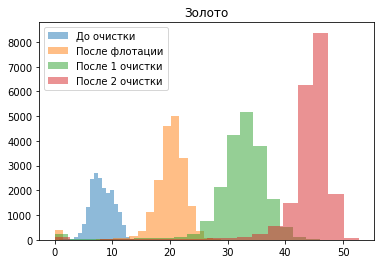

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(au_1, alpha = 0.5, bins = 20)
ax.hist(au_2, alpha = 0.5, bins = 20)
ax.hist(au_3, alpha = 0.5, bins = 20)
ax.hist(au_4, alpha = 0.5, bins = 20)
ax.legend(['До очистки','После флотации', 'После 1 очистки', 'После 2 очистки'])
ax.set_title('Золото')
plt.show()

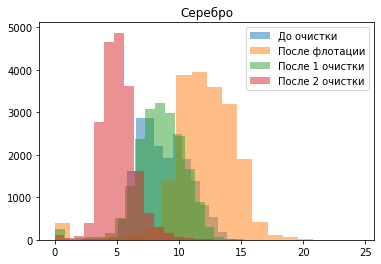

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(ag_1, alpha = 0.5, bins = 20)
ax.hist(ag_2, alpha = 0.5, bins = 20)
ax.hist(ag_3, alpha = 0.5, bins = 20)
ax.hist(ag_4, alpha = 0.5, bins = 20)
ax.legend(['До очистки','После флотации', 'После 1 очистки', 'После 2 очистки'])
ax.set_title('Серебро')
plt.show()

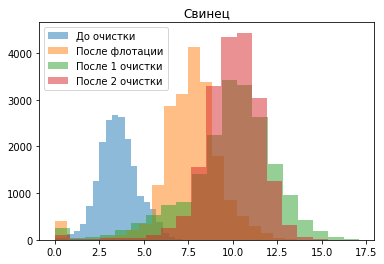

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(pb_1, alpha = 0.5, bins = 20)
ax.hist(pb_2, alpha = 0.5, bins = 20)
ax.hist(pb_3, alpha = 0.5, bins = 20)
ax.hist(pb_4, alpha = 0.5, bins = 20)
ax.legend(['До очистки','После флотации', 'После 1 очистки', 'После 2 очистки'])
ax.set_title('Свинец')
plt.show()

Как видно из полученных графиков, концентрация золота в смеси с каждым этапом очистки становится всё больше, чем, например серебра, его концентрация с изначально довольно высокой становится ещё больше. Концентрация свинца также как и концентрация серебра из изначально высокой становится её больше.

Концентрация серебра после флотации резко увеличивается, а после финальной очистки наоборот уменьшается. Вероятно, это связано со спецификой процесса очистки золота из руды, так как флотация и дальнейшие очистки, вероятно, представляют собой отличные друг от друга процессы. 

#### 2.2 Сравнение распределения размеров гранул сырья
<a id='step_2.2'></a>

Text(0.5, 1.0, 'Сравнение распределений размера гранул на тестовой и обучающей выборках')

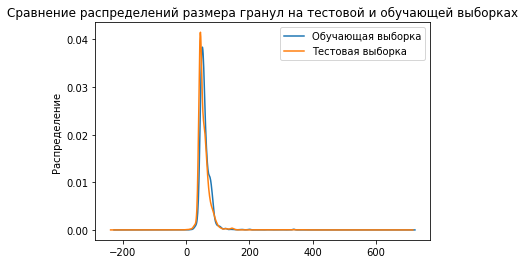

In [16]:
data_train['rougher.input.feed_size'].plot.kde()
data_test['rougher.input.feed_size'].plot.kde()
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.ylabel('Распределение')
plt.title('Сравнение распределений размера гранул на тестовой и обучающей выборках')

На обучающей выборке средний размер гранул меньше, чем на тестовой, однако значения не сильно отличаются между собой. Отличия можно объяснить тем, что изначальная разбивка данных на выборки повлияла на небольшую неоднородность значений.

#### 2.3 Исследование суммарной концентрации всех веществ на разных стадиях
<a id='step_2.3'></a>

In [17]:
sol_1 = data_full['rougher.input.feed_sol']
sol_2 = data_full['rougher.output.concentrate_sol']
sol_4 = data_full['final.output.concentrate_sol']

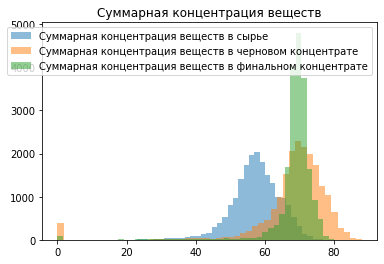

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(au_1 + ag_1 + pb_1 + sol_1, alpha = 0.5, bins = 50)
ax.hist(au_2 + ag_2 + pb_2 + sol_2, alpha = 0.5, bins = 50)
ax.hist(au_4 + ag_4 + pb_4 + sol_4, alpha = 0.5, bins = 50)
ax.legend(['Суммарная концентрация веществ в сырье', 'Суммарная концентрация веществ в черновом концентрате', 'Суммарная концентрация веществ в финальном концентрате'])
ax.set_title('Суммарная концентрация веществ')
plt.show()

На каждом из исследуемых этапов можно увидеть некие аномальные значения, относительно концентрации различных веществ в сырье — это высокие значения в левом хвосте диаграммы, такая же картина есть в распределении концентрации веществ в черновом и финальном концентрате. Вероятно, эти ошибки связаны с каким-то техническим сбоем, поэтому эти аномальные значения стоит удалить из обеих выборок.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
На графике видно значительное количество околонулевых суммарных концентраций. Верно, такие значения стоит удалить.
</div>

In [19]:
threshold = 0.3
stage_1 = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']
stage_2 = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']
stage_3 = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']


for stage in stage_1:
    data_train.drop(data_train[data_train[stage] < threshold].index, inplace = True)
    data_test.drop(data_test[data_test[stage] < threshold].index, inplace = True)

for stage in stage_2:
    data_train.drop(data_train[data_train[stage] < threshold].index, inplace = True)

for stage in stage_3:
    data_train.drop(data_train[data_train[stage] < threshold].index, inplace = True)

    

### 3. Построение модели
<a id='step_3'></a>

#### 3.1. Функция для вычисления итоговой sMAPE
<a id='step_3.1'></a>

In [20]:
def smape(target, predictions):
    score = abs(predictions - target) / (0.5 * (abs(target) + abs(predictions)))
    return score.mean() * 100

Функция выше позволит быстро оценивать качество разработанных моделей. 

#### 3.2. Обучение моделей, оценка лучшей модели на тестовой выборке
<a id='step_3.2'></a>

In [21]:
features_names_rougher = []
for column in data_test.columns:
    if 'rougher.input' in column:
        features_names_rougher.append(column)
    if 'rougher.state' in column:
        features_names_rougher.append(column)

features_train_rougher = data_train[features_names_rougher]

features_train_final = data_train[features].drop(['date'], axis = 1)
target_train_final = data_train['final.output.recovery']
target_train_rougher = data_train['rougher.output.recovery']
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()
features_train_final = scaler_1.fit_transform(features_train_final)
features_train_rougher = scaler_2.fit_transform(features_train_rougher)

In [22]:
model_dtr = DecisionTreeRegressor(random_state = 12345)
model_rfr = RandomForestRegressor(random_state = 12345)
model_lr = LinearRegression(normalize = False)
tree_grid = {'max_depth': range(1, 10)}
forest_grid = {'max_depth': range(1, 10), 'n_estimators': range(1, 100, 10)}
score = make_scorer(smape, greater_is_better = False)
best_tree = RandomizedSearchCV(model_dtr, n_jobs = -1, n_iter = 9, param_distributions = tree_grid, random_state = 12345, scoring = score, cv = 5)
best_forest = RandomizedSearchCV(model_rfr, n_jobs = -1, n_iter = 9, param_distributions = forest_grid, random_state = 12345, scoring = score, cv = 5)

In [23]:
best_tree.fit(features_train_final, target_train_final)
best_forest.fit(features_train_final, target_train_final)
model_lr.fit(features_train_final, target_train_final)
print(best_tree.best_params_)
print(best_forest.best_params_)

{'max_depth': 2}
{'n_estimators': 91, 'max_depth': 4}


In [24]:
best_tree_1 = DecisionTreeRegressor(random_state = 12345, max_depth =2)
best_forest_1 = RandomForestRegressor(random_state = 12345, max_depth =4, n_estimators = 91)
model_lr = LinearRegression(normalize = False)

In [25]:
model_dtr_2 = DecisionTreeRegressor(random_state = 12345)
model_rfr_2 = RandomForestRegressor(random_state = 12345)
model_lr_2 = LinearRegression(normalize = False)
tree_grid = {'max_depth': range(1, 10)}
forest_grid = {'max_depth': range(1, 10), 'n_estimators': range(1, 100, 10)}
best_tree_2 = RandomizedSearchCV(model_dtr_2, n_jobs = -1, n_iter = 9, param_distributions = tree_grid, random_state = 12345, scoring = score, cv = 5)
best_forest_2 = RandomizedSearchCV(model_rfr_2, n_jobs = -1, n_iter = 9, param_distributions = forest_grid, random_state = 12345, scoring = score, cv = 5)

In [26]:
best_tree_2.fit(features_train_rougher, target_train_rougher)
best_forest_2.fit(features_train_rougher, target_train_rougher)
model_lr_2.fit(features_train_rougher, target_train_rougher)
print(best_tree_2.best_params_)
print(best_forest_2.best_params_)

{'max_depth': 4}
{'n_estimators': 91, 'max_depth': 4}


In [27]:
best_tree_rough = DecisionTreeRegressor(random_state = 12345, max_depth =4)
best_forest_rough  = RandomForestRegressor(random_state = 12345, max_depth =4, n_estimators = 91)
model_lr_rough = LinearRegression(normalize = False)

Проверим три модели, чтобы найти самый лучший параметр `smape`. Для начала важно опрделить параметры для оценки эффективности очистики данных после флотации и после. Так как не все строки влияют на расчёт финального значения, стоит четко определить параметры для моделtq `rougher`. При помощи сетки мы смогли найти лучшие гиперпараметры для модели случайного леса и решающего дерева. Также стоит обучить модели на тренировочной выборке.

In [28]:
tree_score_1 = cross_val_score(best_tree_rough, features_train_rougher, target_train_rougher, cv = 5, scoring = score, n_jobs = -1)
forest_score_1 = cross_val_score(best_forest_rough, features_train_rougher, target_train_rougher, cv = 5, scoring = score, n_jobs = -1)
lreg_score_1 = cross_val_score(model_lr_rough, features_train_rougher, target_train_rougher, cv = 5, scoring = score, n_jobs = -1)

print('Значение sMAPE для решающего дерева равно', abs(tree_score_1).mean(), 'для оценки чернового концентрата')
print('Значение sMAPE для случайного леса равно', abs(forest_score_1).mean(), 'для оценки чернового концентрата')
print('Значение sMAPE для линейной регрессии', abs(lreg_score_1).mean(), 'для оценки чернового концентрата')

Значение sMAPE для решающего дерева равно 6.879876598866557 для оценки чернового концентрата
Значение sMAPE для случайного леса равно 6.590690084561982 для оценки чернового концентрата
Значение sMAPE для линейной регрессии 6.566307098558241 для оценки чернового концентрата


Как видно из прменения кросс-валидации, из трех моделей самый низкий показатель дала модель линейной регрессии, при этом показатели всех трёх моделей не очень отличаются между собой.

In [29]:
tree_score_2 = cross_val_score(best_tree_1, features_train_final, target_train_final, cv = 3, scoring = score, n_jobs = -1)
forest_score_2 = cross_val_score(best_forest_1, features_train_final, target_train_final, cv = 3, scoring = score, n_jobs = -1)
lreg_score_2 = cross_val_score(model_lr, features_train_final, target_train_final, cv = 3, scoring = score, n_jobs = -1)

print('Значение sMAPE для решающего дерева равно', abs(tree_score_2).mean(), 'для оценки финального концентрата')
print('Значение sMAPE для случайного леса равно', abs(forest_score_2).mean(), 'для оценки финального концентрата')
print('Значение sMAPE для линейной регрессии', abs(lreg_score_2).mean(), 'для оценки финального концентрата')

Значение sMAPE для решающего дерева равно 10.778982367229766 для оценки финального концентрата
Значение sMAPE для случайного леса равно 10.773645339931731 для оценки финального концентрата
Значение sMAPE для линейной регрессии 13.691328890319516 для оценки финального концентрата


Оценка финального концентрата позволяет увидеть совсем другую картину, лучший показатель теперь у модели случайного леса, незначительно меньше, чем у решающего дерева. Линейная регрессия даёт более выскокий показатель. Можно сказать, что это связано с тем, как меняются значения параметров после стадий финальной очистки. Для дальнейшей работы и проверки модели на тестовой выборке будем использовать модель случайного леса.

In [30]:
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')
target_test_final = data_test['final.output.recovery']
target_test_rougher = data_test['rougher.output.recovery']
features_test_final = data_test[features].drop(['date'], axis = 1)
features_test_final = scaler_1.transform(features_test_final)
features_test_rougher = data_test[features_names_rougher]
features_test_rougher = scaler_2.transform(features_test_rougher)

In [31]:
def final_smape(model_final, model_rougher, features_final, features_rougher, target_final, target_rougher):
    predictions_final = model_final.predict(features_final)
    predictions_rougher = model_rougher.predict(features_rougher)
    smape_rougher = smape(target_rougher, predictions_rougher)
    smape_final = smape(target_final, predictions_final)
    smape_total = 0.75 * smape_final + 0.25 * smape_rougher
    return smape_total    


In [32]:
model_lr_rough.fit(features_train_rougher, target_train_rougher)
best_forest_1.fit(features_train_final, target_train_final)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=91,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

In [33]:
result_lreg = final_smape(best_forest_1, model_lr_rough, features_test_final, features_test_rougher, target_test_final, target_test_rougher)
print('Итоговый sMAPE модели равен', result_lreg)
median_final = target_train_final.median()
median_rougher = target_train_rougher.median()
result_median = smape(target_test_final, median_final) * 0.75 + smape(target_test_rougher, median_rougher)*0.25
print('Итоговый sMAPE медианного предсказания равен', result_median)

Итоговый sMAPE модели равен 9.38307168373277
Итоговый sMAPE медианного предсказания равен 9.401676959554791


Определив параметры для тестовой выборки, мы смогли при помощи функции `final_smape` оценить модели на тестовых данных. Из проведенного выше анализа видно, что предсказанное моделью значение sMAPE равно `9.38`, это меньше, чем значение константной модели `9.4`. Поэтому можно сделать вывод об адекватности модели. 

### Итоговый вывод
<a id='step_4'></a>

Преводенный анализ позволяет сделать следующие выводы:

- при работе с большим объёмом данных важно понимать значения всех параметров и проверять точность рассчётов
- необходимо следить за наличием аномальных значений в выборке, которые при большом объёме данных могут сильно влиять на результат
- для прогноза значений на двух этапах важно различать параметры, которые в дальнейшем входят в модель
- кросс-валидация эффективно позволяет наглядно сравнить между собой несколько моделей 
- функции позволяют существенно автоматизировать многие действия, что особенно важно при работе с несколькими моделями


В целом проект оказался интересным, но довольно сложным. Лучшие значения даёт модель линейной регрессии, и несмотря на то, что разница между этой моделью и другими не очень большая, при применении этой модели на практике она может сказаться сильнее. 